In [183]:
###########                Canny Edge Detection                 ################
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

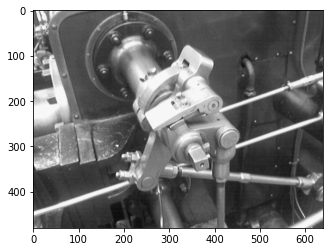

In [184]:
img=cv2.imread("images/machine.png",0)
plt.imshow(img,'gray')
plt.show()

In [185]:
def Sobel(img):
    img_pad=np.asarray(cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_CONSTANT,value=0))
    img_blur=np.zeros_like(img)
    # kernel=np.array([
    # [1,4,6,4,1],
    # [4,16,24,16,4],
    # [6,24,36,24,6],
    # [4,16,24,16,4],
    # [1,4,6,4,1]])
    kernel=np.array([[1,1,1],[1,1,1],[1,1,1]])
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_blur[i,j]=np.sum(img_pad[i:i+kernel.shape[0],j:j+kernel.shape[1]]*kernel)//np.sum(kernel)
    img_blur=img
    sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sobel_y=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    img_blur_pad=cv2.copyMakeBorder(img_blur,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
    edge_sobel=np.zeros(img.shape)
    angle_sobel=np.zeros(img.shape,dtype=np.float64)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sx=np.sum(img_blur_pad[i:i+3,j:j+3]*sobel_x)
            sy=np.sum(img_blur_pad[i:i+3,j:j+3]*sobel_y)
            edge_sobel[i,j]=round(math.sqrt(sy*sy + sx*sx))
            angle_sobel[i,j] = math.atan2(sy, sx)

    return edge_sobel,(angle_sobel * 180. / np.pi)

In [186]:

def Canny(img,u_th,l_th):
  img_grad,img_angle=Sobel(img)

  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          if img_angle[i,j]<0:
            img_angle[i,j]+=180
 
  img_canny=np.zeros(img.shape,dtype=np.int32)
  
  for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
        m=255
        n=255
        if (img_angle[i,j]>=0 and img_angle[i,j]<22.5) or (157.5 <= img_angle[i,j] and img_angle[i,j]<= 180):
          m=img_grad[i,j-1]
          n=img_grad[i,j+1]
        elif img_angle[i,j]>=22.5 and img_angle[i,j]<67.5:
          m=img_grad[i+1,j-1]
          n=img_grad[i-1,j+1]
        elif img_angle[i,j]>=67.5 and img_angle[i,j]<112.5:
          m=img_grad[i+1,j]
          n=img_grad[i-1,j]
        elif img_angle[i,j]>=112.5 and img_angle[i,j]<157.5:
          m=img_grad[i+1,j+1]
          n=img_grad[i-1,j-1]

        if img_grad[i,j]>=m and img_grad[i,j]>=n:
          img_canny[i,j]=img_grad[i,j]
        else:
          img_canny[i,j]=0
  
  
  for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
      if img_canny[i,j]<u_th and img_canny[i,j]>=l_th:
        if True in (img_canny[i-1:i+2,j-1:j+2]>=u_th):
          img_canny[i,j]=255
        else:
          img_canny[i,j]=0
      elif img_canny[i,j]>=u_th:
        img_canny[i,j]=255
      elif img_canny[i,j]<l_th:
        img_canny[i,j]=0

  return img_canny


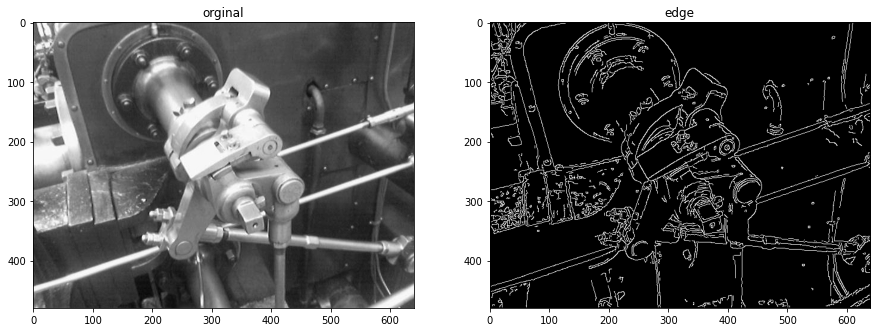

In [191]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img,'gray')
plt.title('orginal')
plt.subplot(1,2,2)
plt.imshow(Canny(img,100,50),'gray')
plt.title('edge')
plt.show()